## Dimensionality (reduction) of political landscapes
Fynn Bachmann, University of Hamburg

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from openTSNE import TSNE
from sklearn.decomposition import PCA
from utils import embedFlags

Don't forget to introduce yourself. Click on [this link](./slides.pdf) to open a short presentation...


In [2]:
dataset = pd.read_csv('data/EVS_Integrated_Dataset.csv', index_col=(0,1))
dataset

I have complete control over my life  \
country region                                         
de      DE3                                      3.0   
        DED                                      8.0   
        DED                                      9.0   
        DED                                      7.0   
        DED                                      8.0   
...                                              ...   
gb      UKM8                                     8.0   
        UKM8                                     9.0   
        UKM8                                    10.0   
        UKM8                                     8.0   
        UKM8                                     8.0   

                I am satisfied with my life   God is important in my life  \
country region                                                              
de      DE3                             4.0                           5.0   
        DED                             8.0                           2.0   
        DED                            10.0                           1.0   
        DED                             8.0                           8.0   
        DED                             8.0                           1.0   
...                                     ...                           ...   
gb      UKM8                            9.0                           1.0   
        UKM8                            8.0                           1.0   
        UKM8                           10.0                           5.0   
        UKM8                            9.0                           1.0   
        UKM8                            8.0                           1.0   

                Do you consider yourself 'left' or right'?  \
country region                                               
de      DE3                                            4.0   
        DED                                            4.0   
        DED                                            5.0   
        DED                                            2.0   
        DED                                            4.0   
...                                                    ...   
gb      UKM8                                           4.0   
        UKM8                                           9.0   
        UKM8                                           3.0   
        UKM8                                           5.0   
        UKM8                                           6.0   

                Everyone is responsible for him/herself  \
country region                                            
de      DE3                                         2.0   
        DED                                         6.0   
        DED                                         7.0   
        DED                                         4.0   
        DED                                         6.0   
...                                                 ...   
gb      UKM8                                        5.0   
        UKM8                                        9.0   
        UKM8                                        4.0   
        UKM8                                        5.0   
        UKM8                                        5.0   

                The unemployed should take any job  Competition is good  \
country region                                                            
de      DE3                                    6.0                  6.0   
        DED                                    5.0                  5.0   
        DED                                   10.0                  9.0   
        DED                                    4.0                  9.0   
        DED                                    6.0                  7.0   
...                                            ...                  ...   
gb      UKM8                                   6.0                  8.0   
        UKM8                       

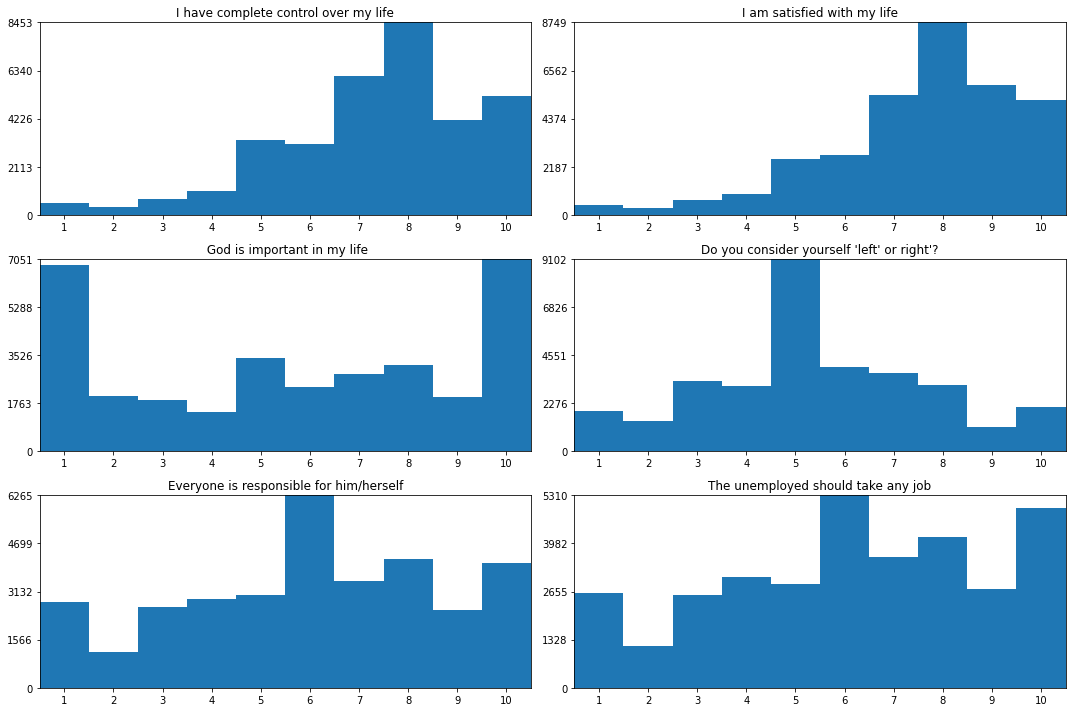

In [3]:
fig, axes = plt.subplots(3,2, figsize=(15,10))

for ax, name in zip(axes.flatten(),dataset):
    val, _, _ = ax.hist(dataset[name], bins=np.arange(11)+.5, width=1)
    ax.set(title = name,
           xlim  = (.5,10.5),
           ylim  = (0, val.max()),
           yticks = np.linspace(0,val.max()+1, 5),
           xticks = np.linspace(1,10, 10))

plt.tight_layout()

In [4]:
labels = dict(zip(dataset.index.get_level_values(1),dataset.index.get_level_values(0)))
countries = dataset.groupby(level=1).mean()
countries.index = countries.index.to_series().map(labels)
countries

,I have complete control over my life,I am satisfied with my life,God is important in my life,Do you consider yourself 'left' or right'?,Everyone is responsible for him/herself,The unemployed should take any job,Competition is good,Incomes should be made equal,Private ownership should be increased,My country is governed democratically,...,Do you justify: cheating on tax,Do you justify: accepting a bribe,Do you justify: homosexuality,Do you justify: prostitution,Do you justify: abortion,Do you justify: divorce,Do you justify: euthanasia,Do you justify: suicide,Do you justify: having casual sex,Do you justify: death penalty
region,,,,,,,,,,,,,,,,,,,,,
al,6.849593,7.121951,9.621951,6.252033,6.349593,7.048780,8.219512,4.922764,6.646341,3.829268,...,1.422764,1.536585,1.727642,1.207317,2.410569,3.869919,2.146341,1.126016,1.573171,3.467480
al,7.260726,7.323432,8.970297,5.267327,5.914191,7.211221,8.792079,5.326733,6.871287,4.181518,...,1.706271,1.792079,2.244224,1.960396,3.155116,4.349835,3.231023,1.240924,1.798680,3.666667
al,6.864407,7.003390,8.949153,4.827119,5.925424,7.349153,9.013559,4.644068,6.833898,4.477966,...,1.545763,1.528814,2.393220,1.959322,3.274576,4.301695,2.671186,1.227119,1.528814,4.227119
am,7.305970,6.517413,7.940299,4.636816,5.614428,5.375622,7.427861,4.017413,6.490050,3.390547,...,4.164179,1.771144,1.609453,2.614428,2.982587,3.539801,2.818408,1.848259,2.885572,2.281095
am,7.364017,6.648536,8.280335,5.087866,5.782427,5.552301,7.589958,4.740586,5.899582,3.953975,...,3.087866,1.401674,1.276151,1.962343,2.322176,3.146444,3.058577,1.401674,2.242678,1.991632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gb,7.400000,7.933333,4.000000,5.755556,6.600000,5.911111,7.577778,4.511111,5.911111,7.044444,...,1.977778,1.377778,7.444444,3.822222,7.333333,8.088889,6.822222,4.355556,5.422222,3.888889
gb,7.438596,8.070175,4.122807,5.526316,6.298246,6.333333,7.157895,5.456140,6.000000,7.017544,...,1.368421,1.157895,7.789474,4.175439,6.877193,7.859649,6.947368,4.719298,5.508772,4.175439
gb,7.545455,7.636364,3.924242,5.439394,6.378788,5.924242,7.151515,5.136364,5.666667,6.984848,...,1.833333,1.212121,7.939394,4.363636,7.045455,7.848485,7.166667,5.106061,5.696970,4.333333


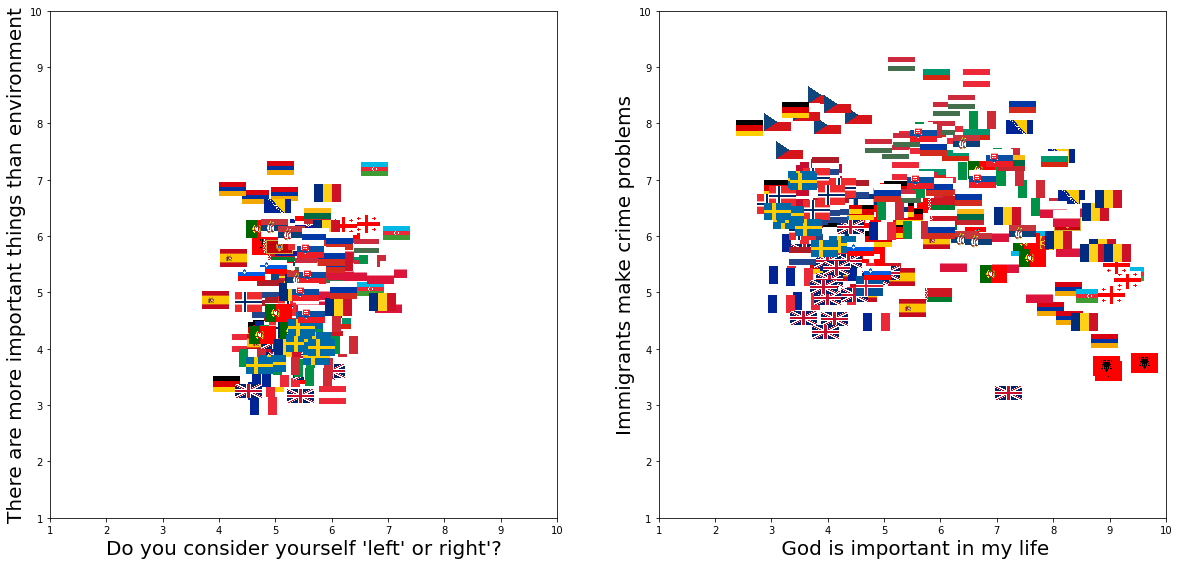

In [5]:
L = 3,17
R = 2,12

fig, axes = plt.subplots(1,2,figsize=(20,10))

for (A,B), ax in zip((L, R), axes):
    
    X, Y = countries.iloc[:,A], countries.iloc[:,B]
    embedding = pd.concat([X,Y], axis=1, keys=['x','y'])
    embedding['sizes'] = 3
    
    embedFlags(embedding, ax=ax)
    
    ax.set_xlabel(countries.columns[A], fontsize=20)
    ax.set_ylabel(countries.columns[B], fontsize=20)
    
    ax.set(aspect='equal', xlim=(1,10), ylim=(1,10))
    
plt.show()

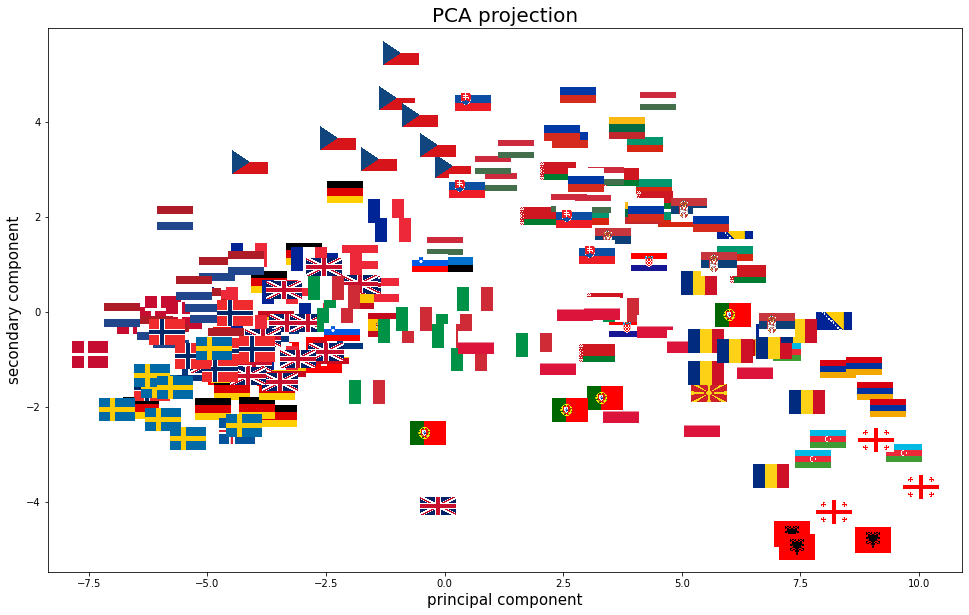

In [6]:
pca = PCA(n_components=2)
projection = pca.fit_transform(countries)
projection = pd.DataFrame(projection, index=countries.index, columns=['x','y'])
projection['sizes'] = 4

fig, ax = plt.subplots(figsize=(20,10))
embedFlags(projection, ax=ax)
ax.set_aspect('equal')
ax.set_title('PCA projection', fontsize=20)
ax.set_xlabel('principal component', fontsize=15)
ax.set_ylabel('secondary component', fontsize=15)
plt.show()

In [10]:
A,B = pca.components_
print("Explained variance ratio:",pca.explained_variance_ratio_)
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,15), dpi=700)
pd.Series(np.abs(A), index=dataset.columns).plot.barh(ax=ax1)
pd.Series(np.abs(B), index=dataset.columns).plot.barh(ax=ax2)
ax1.set(title='principal component', xlabel='impact of feature')
ax2.set(title='secondary component', xlabel='impact of feature')
plt.show()

Explained variance ratio: [0.55659791 0.09755976]


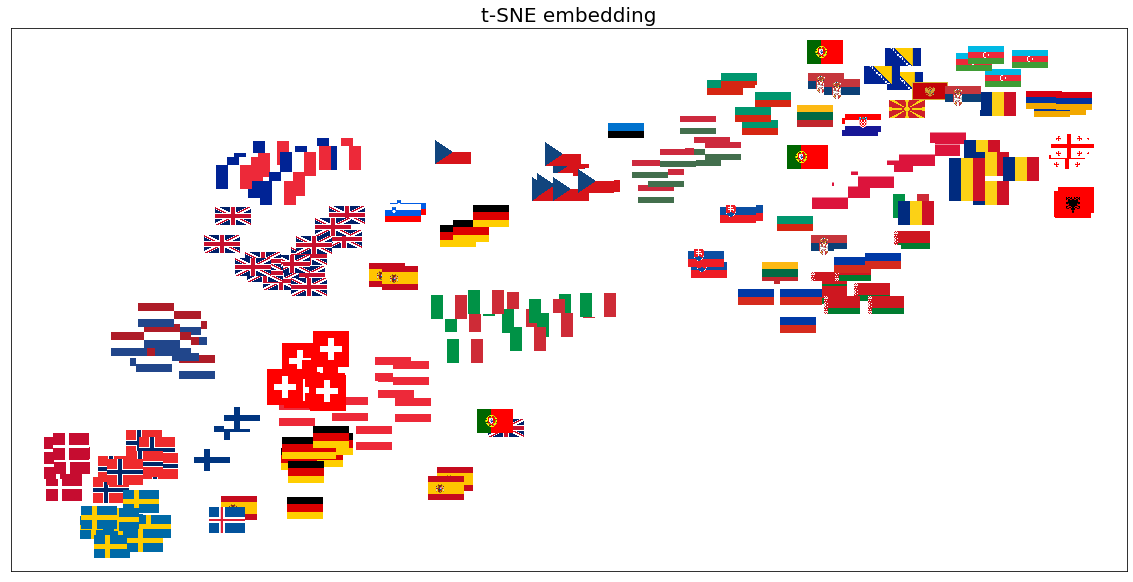

In [11]:
tsne = TSNE(random_state=2, initialization='random')
embedding = tsne.fit(countries)
embedding = pd.DataFrame(embedding, index=countries.index, columns=['x','y'])
embedding['sizes'] = 4

fig, ax = plt.subplots(figsize=(20,10))
embedFlags(embedding, ax=ax)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('t-SNE embedding', fontsize=20)
plt.show()

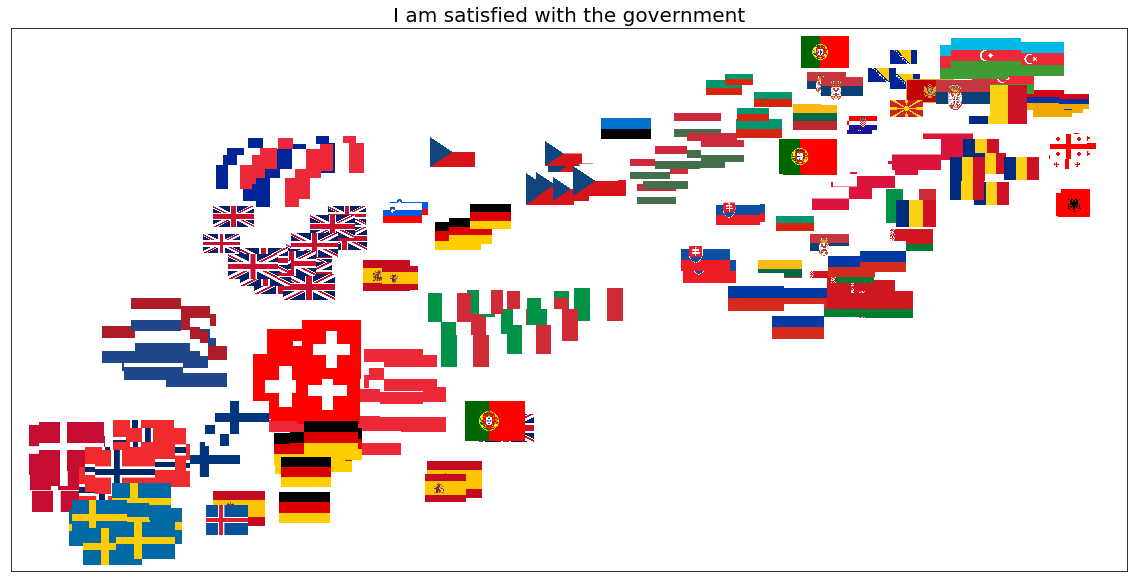

In [12]:
### select feature
F = 10

### get sizes of flags
embedding['sizes'] = countries.iloc[:,F].values

fig, ax = plt.subplots(figsize=(20,10))
embedFlags(embedding, ax=ax)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title(countries.columns[F], fontsize=20)
plt.show()

In [13]:
dataset.columns

Index(['I have complete control over my life', 'I am satisfied with my life',
       ' God is important in my life',
       'Do you consider yourself 'left' or right'?',
       'Everyone is responsible for him/herself',
       'The unemployed should take any job', 'Competition is good',
       'Incomes should be made equal', 'Private ownership should be increased',
       'My country is governed democratically',
       'I am satisfied with the government', 'Immigrants take jobs away',
       'Immigrants make crime problems',
       'Immigration is a strain on welfare system',
       'Immigrants should maintain their traditions',
       'I would give money for the environment',
       'Someone like me can do much for environment',
       'There are more important things than environment',
       'Others should start to protect the environment',
       'Environmental threats are exaggerated',
       'Do you justify: claiming state benefits',
       'Do you justify: avoiding a fare on pub